# D42-1
* **不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。**
* **確保你理解決策樹這個非常重要的模型中每個超參數，並試著調整看看，對最終預測結果的影響為何。**
* **試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？**

## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [16]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

In [11]:
# 建立模型
clf1 = DecisionTreeClassifier()
# 訓練模型
clf1.fit(x_train, y_train)
# 預測測試集
y_pred = clf1.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [13]:
# 建立模型
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=1)
# 訓練模型
clf2.fit(x_train, y_train)
# 預測測試集
y_pred = clf2.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.6842105263157895


# D42-2
* **改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較。**

In [14]:
boston_data = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target, test_size=0.25, random_state=4)

In [21]:
# 建立模型
rg1 = DecisionTreeRegressor(criterion="mse", splitter="best")
# 訓練模型
rg1.fit(x_train, y_train)
# 預測測試集
y_pred = rg1.predict(x_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 28.02


In [22]:
# 建立模型
rg2 = DecisionTreeRegressor(criterion="mae", splitter="random")
# 訓練模型
rg2.fit(x_train, y_train)
# 預測測試集
y_pred = rg2.predict(x_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 41.58


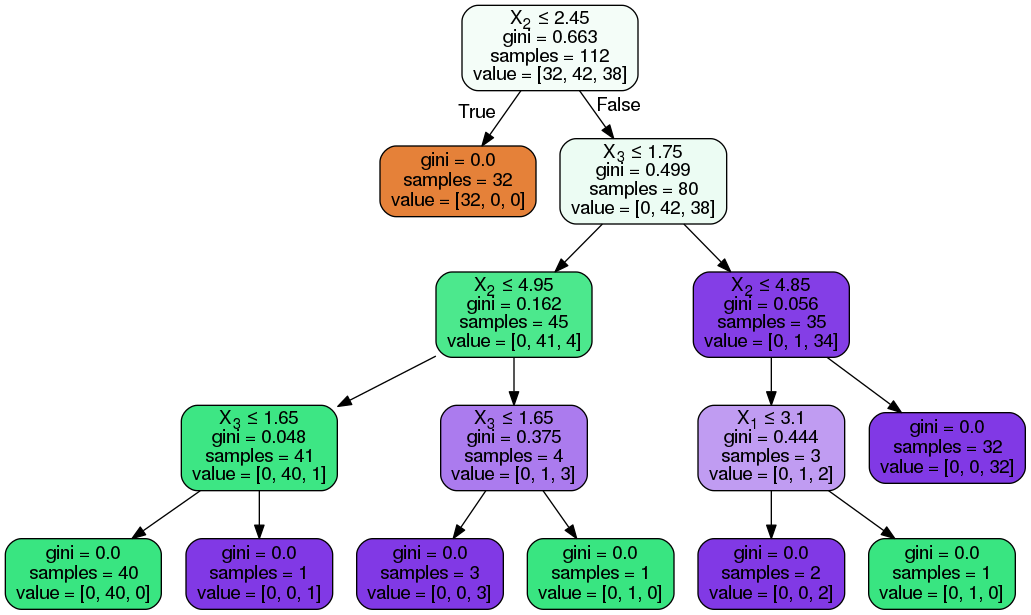

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
